Collate star results

In [1]:
import os
import glob
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
scale = 'DR14_ASPC'

In [3]:
results = []
for path in glob.glob(f'star_results/{scale}/*/star/results.csv'):
    results.append(pd.read_csv(path))
results = pd.concat(results, ignore_index=True)
results.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hdi_3%,f_evol_hdi_97%,...,mhs_ess_mean,mhs_ess_sd,mhs_ess_tail,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd
0,KIC8696343,0.329544,0.535028,0.750714,3465.026645,3470.784552,3470.784552,4452.795022,0.178496,0.894584,...,7347.022597,5945.967286,6905.728819,-0.091808,0.163315,0.000802,0.000631,0.039864,1.000220,0.068781
1,KIC11137075,1.645226,1.720488,1.784974,3419.524685,3409.395788,3406.321111,4298.200541,1.608032,1.816053,...,8663.535743,7198.275620,5416.568670,-0.205533,-0.025844,0.000514,0.000399,-0.115516,1.000865,0.047839
2,KIC8394589,0.296880,0.490792,0.648651,2711.258019,2684.985793,2684.985793,3108.726395,0.185376,0.740457,...,8237.429490,8227.081920,6834.469567,-0.429907,-0.146638,0.000846,0.000599,-0.286765,1.001393,0.076776
3,KIC8106950,1.437524,1.621428,1.743955,939.027429,476.027185,476.027185,334.784723,1.221600,1.858592,...,6597.026973,6127.504242,5393.447887,-0.464165,-0.229389,0.000771,0.000566,-0.344709,1.002114,0.062654
4,KIC11021413,1.840180,1.876796,1.906506,3078.224992,3100.655394,3096.632667,5051.944766,1.811953,1.926169,...,5559.977556,4709.437599,5477.773785,-0.060868,0.097428,0.000562,0.000432,0.021168,1.000584,0.041893


In [4]:
results['divergences'] = 0

for path in glob.glob(f'star_results/{scale}/*/star.log'):
    name = path.split('/')[2]
    with open(path, 'r') as file:
        lines = file.read().splitlines()
    for line in lines:
        if 'divergences' in line:
            phrase = 'There were '
            start = line.find(phrase) + len(phrase)
            end = line.find(' divergences')
            div = line[start:end]
            results.at[results['name']==name, 'divergences'] = int(div)

In [5]:
results.sort_values('divergences', ascending=False).head(10)

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hdi_3%,f_evol_hdi_97%,...,mhs_ess_sd,mhs_ess_tail,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,divergences
76,KIC6933899,1.091619,1.280720,1.448915,260.029011,299.776770,290.556272,350.786029,0.995728,1.545845,...,1405.366336,2117.513261,-0.082269,0.166702,0.001755,0.001241,0.043656,1.008746,0.065786,102
5,KIC3656476,0.933139,1.226183,1.410875,214.682470,175.761563,175.761563,575.906040,0.815194,1.508132,...,2282.142848,2656.085728,0.171267,0.395982,0.001217,0.000880,0.284439,1.003845,0.059428,101
77,KIC7296438,0.915207,1.176369,1.418846,38.596102,37.206814,37.206814,132.397650,0.791482,1.503119,...,633.431286,1373.799924,0.139322,0.379770,0.002438,0.001818,0.262211,1.012859,0.064683,63
72,KIC7680114,0.979518,1.251929,1.417131,200.323435,180.017213,180.017213,340.261476,0.866244,1.509482,...,1111.473397,1560.576899,-0.010636,0.248215,0.001900,0.001455,0.124847,1.004206,0.068564,46
21,KIC4450844,1.299543,1.439487,1.566963,131.718046,89.739567,89.739567,37.754338,1.213907,1.652800,...,3534.061093,4315.599829,-0.273367,-0.012545,0.001156,0.000817,-0.144475,1.006886,0.068714,16
12,KIC11244118,1.266552,1.513819,1.707855,273.930411,294.073126,282.786249,601.032784,1.148479,1.794531,...,669.225305,2041.383752,0.186307,0.405908,0.002237,0.001582,0.301542,1.013130,0.057865,8
48,KIC12265063,1.190202,1.479722,1.630230,74.489677,52.113788,52.113788,28.115414,0.956762,1.716406,...,5854.902046,5984.631581,-0.289334,-0.032451,0.000882,0.000636,-0.161061,1.001180,0.068810,7
3,KIC8106950,1.437524,1.621428,1.743955,939.027429,476.027185,476.027185,334.784723,1.221600,1.858592,...,6127.504242,5393.447887,-0.464165,-0.229389,0.000771,0.000566,-0.344709,1.002114,0.062654,5
42,KIC8938364,1.111877,1.300386,1.454291,2260.959316,2293.628054,2293.628054,3222.384059,1.015285,1.529237,...,6190.265528,5718.765956,-0.206249,0.055883,0.000787,0.000621,-0.076497,1.001573,0.069110,3
50,KIC8012842,0.788407,1.035670,1.290066,1404.355900,1323.599102,1323.599102,3558.019284,0.627463,1.453025,...,4182.615250,3810.072794,0.088100,0.324546,0.000915,0.000682,0.210262,1.003238,0.062397,3


In [42]:
# inputs = pd.read_csv(f'../../data/stellr/inputs_{scale}.csv')
# inputs.head()

,name,teff,teff_err,lum,lum_err,dnu,dnu_err,mhs,mhs_err,logg,logg_err,bad_data,on_grid_1e,on_grid_2e
0,KIC5950854,5914.0347,134.60000,1.813844,0.062565,96.857,0.194,-0.173085,0.073964,4.237158,0.009836,0,1,1
1,KIC7799349,4976.7870,82.60566,4.421854,0.138701,33.299,0.322,0.284619,0.029484,3.670984,0.007718,0,0,0
2,KIC5822889,5184.0103,94.43386,12.830989,0.707319,19.708,0.127,-0.026246,0.039186,3.401706,0.012167,0,0,0
3,KIC12069569,6062.4185,168.10576,7.144911,0.291244,44.687,2.162,-0.084244,0.066659,3.825712,0.060999,0,0,0
4,KIC6947945,5334.4380,103.46670,3.806103,0.153818,43.660,1.416,-0.041512,0.043107,3.794063,0.011004,0,0,0


In [6]:
# df = inputs.merge(results, on='name')
df = results
df.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hdi_3%,f_evol_hdi_97%,...,mhs_ess_sd,mhs_ess_tail,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,divergences
0,KIC8696343,0.329544,0.535028,0.750714,3465.026645,3470.784552,3470.784552,4452.795022,0.178496,0.894584,...,5945.967286,6905.728819,-0.091808,0.163315,0.000802,0.000631,0.039864,1.000220,0.068781,0
1,KIC11137075,1.645226,1.720488,1.784974,3419.524685,3409.395788,3406.321111,4298.200541,1.608032,1.816053,...,7198.275620,5416.568670,-0.205533,-0.025844,0.000514,0.000399,-0.115516,1.000865,0.047839,0
2,KIC8394589,0.296880,0.490792,0.648651,2711.258019,2684.985793,2684.985793,3108.726395,0.185376,0.740457,...,8227.081920,6834.469567,-0.429907,-0.146638,0.000846,0.000599,-0.286765,1.001393,0.076776,0
3,KIC8106950,1.437524,1.621428,1.743955,939.027429,476.027185,476.027185,334.784723,1.221600,1.858592,...,6127.504242,5393.447887,-0.464165,-0.229389,0.000771,0.000566,-0.344709,1.002114,0.062654,5
4,KIC11021413,1.840180,1.876796,1.906506,3078.224992,3100.655394,3096.632667,5051.944766,1.811953,1.926169,...,4709.437599,5477.773785,-0.060868,0.097428,0.000562,0.000432,0.021168,1.000584,0.041893,0


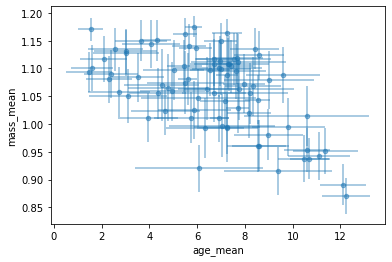

In [7]:
df.plot(kind='scatter', x='age_mean', y='mass_mean', xerr='age_sd', yerr='mass_sd', alpha=0.5)

In [8]:
cond = df['mass_50th'] + (df['mass_50th'] - df['mass_16th']) > 1.2
df[cond]

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hdi_3%,f_evol_hdi_97%,...,mhs_ess_sd,mhs_ess_tail,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,divergences
6,KIC6129877,0.608153,0.765980,0.925320,1815.817843,1685.359632,1507.963777,2268.239040,0.441532,1.120031,...,5498.513937,6139.966336,-0.134621,0.127051,0.000932,0.000664,-0.006804,1.000817,0.069670,0
28,KIC8677016,0.644784,0.791050,0.963623,2477.431154,2324.921546,2221.810577,3559.418606,0.510866,1.133473,...,7546.826309,7307.783179,-0.199409,0.044884,0.000708,0.000531,-0.074758,1.000193,0.065286,0
41,KIC10417911,1.539631,1.666886,1.742852,4072.361260,3912.740916,3912.740916,4890.598176,1.433381,1.798792,...,5830.133871,6271.714312,0.171438,0.359029,0.000655,0.000468,0.266868,1.000905,0.050503,0
65,KIC11294717,1.468806,1.627235,1.731695,5026.050698,4825.380504,4825.380504,6304.962053,1.344802,1.824086,...,6536.952718,7338.664625,-0.002921,0.225932,0.000741,0.000539,0.112732,1.000163,0.061586,0
74,KIC4346201,1.259891,1.465955,1.615997,2819.311315,2831.043435,2831.043435,4061.561250,1.153804,1.724316,...,5921.834388,5227.500559,-0.390285,-0.186780,0.000687,0.000501,-0.285299,1.000345,0.054517,1


In [9]:
df['mass_84th_50th'] = df['mass_84th'] - df['mass_50th']

In [10]:
cond = df['mass_50th'] + df['mass_84th_50th'].median() > 1.2
df[cond]

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hdi_3%,f_evol_hdi_97%,...,mhs_ess_tail,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,divergences,mass_84th_50th
6,KIC6129877,0.608153,0.765980,0.925320,1815.817843,1685.359632,1507.963777,2268.239040,0.441532,1.120031,...,6139.966336,-0.134621,0.127051,0.000932,0.000664,-0.006804,1.000817,0.069670,0,0.027772
28,KIC8677016,0.644784,0.791050,0.963623,2477.431154,2324.921546,2221.810577,3559.418606,0.510866,1.133473,...,7307.783179,-0.199409,0.044884,0.000708,0.000531,-0.074758,1.000193,0.065286,0,0.030553
29,KIC9757640,1.438065,1.621169,1.729836,2767.056911,2971.057422,2919.467723,4593.426365,1.316832,1.799603,...,3618.258913,0.260313,0.462353,0.000791,0.000577,0.367901,1.001175,0.054828,1,0.021044
34,KIC6232600,0.318784,0.441095,0.572693,3103.328268,3061.307925,3061.307925,5216.677170,0.246638,0.648116,...,6903.594791,-0.439641,-0.154990,0.000854,0.000609,-0.290634,1.000175,0.075723,0,0.016705
35,KIC9119139,1.418793,1.612768,1.735382,3570.631344,3587.907431,3545.430964,5857.938836,1.275438,1.825247,...,5542.294300,0.151901,0.380244,0.000770,0.000572,0.261005,1.001432,0.060922,1,0.029317
41,KIC10417911,1.539631,1.666886,1.742852,4072.361260,3912.740916,3912.740916,4890.598176,1.433381,1.798792,...,6271.714312,0.171438,0.359029,0.000655,0.000468,0.266868,1.000905,0.050503,0,0.014355
65,KIC11294717,1.468806,1.627235,1.731695,5026.050698,4825.380504,4825.380504,6304.962053,1.344802,1.824086,...,7338.664625,-0.002921,0.225932,0.000741,0.000539,0.112732,1.000163,0.061586,0,0.021126
74,KIC4346201,1.259891,1.465955,1.615997,2819.311315,2831.043435,2831.043435,4061.561250,1.153804,1.724316,...,5227.500559,-0.390285,-0.186780,0.000687,0.000501,-0.285299,1.000345,0.054517,1,0.027185


In [11]:
df['off_grid'] = 0
df.loc[cond, 'off_grid'] = 1
df.head()

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hdi_3%,f_evol_hdi_97%,...,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,divergences,mass_84th_50th,off_grid
0,KIC8696343,0.329544,0.535028,0.750714,3465.026645,3470.784552,3470.784552,4452.795022,0.178496,0.894584,...,-0.091808,0.163315,0.000802,0.000631,0.039864,1.000220,0.068781,0,0.038152,0
1,KIC11137075,1.645226,1.720488,1.784974,3419.524685,3409.395788,3406.321111,4298.200541,1.608032,1.816053,...,-0.205533,-0.025844,0.000514,0.000399,-0.115516,1.000865,0.047839,0,0.040208,0
2,KIC8394589,0.296880,0.490792,0.648651,2711.258019,2684.985793,2684.985793,3108.726395,0.185376,0.740457,...,-0.429907,-0.146638,0.000846,0.000599,-0.286765,1.001393,0.076776,0,0.041525,0
3,KIC8106950,1.437524,1.621428,1.743955,939.027429,476.027185,476.027185,334.784723,1.221600,1.858592,...,-0.464165,-0.229389,0.000771,0.000566,-0.344709,1.002114,0.062654,5,0.062659,0
4,KIC11021413,1.840180,1.876796,1.906506,3078.224992,3100.655394,3096.632667,5051.944766,1.811953,1.926169,...,-0.060868,0.097428,0.000562,0.000432,0.021168,1.000584,0.041893,0,0.048637,0


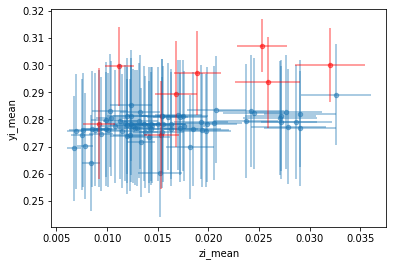

In [12]:
fig, ax = plt.subplots()

df[~cond].plot(ax=ax, kind='scatter', x='zi_mean', y='yi_mean', 
        xerr='zi_sd', yerr='yi_sd', alpha=0.5)
df[cond].plot(ax=ax, kind='scatter', x='zi_mean', y='yi_mean', 
        xerr='zi_sd', yerr='yi_sd', c='r', alpha=0.5)

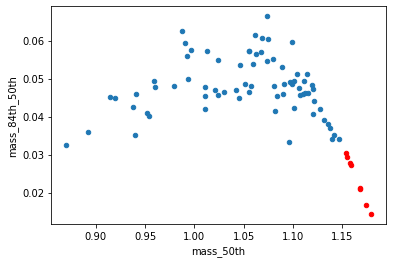

In [13]:
ax = df[~cond].plot(kind='scatter', x='mass_50th', y='mass_84th_50th')
df[cond].plot(ax=ax, kind='scatter', x='mass_50th', y='mass_84th_50th', c='r')

In [14]:
df[df['divergences']>0].sort_values('divergences', ascending=False)

,name,f_evol_16th,f_evol_50th,f_evol_84th,f_evol_ess_bulk,f_evol_ess_mean,f_evol_ess_sd,f_evol_ess_tail,f_evol_hdi_3%,f_evol_hdi_97%,...,mhs_hdi_3%,mhs_hdi_97%,mhs_mcse_mean,mhs_mcse_sd,mhs_mean,mhs_r_hat,mhs_sd,divergences,mass_84th_50th,off_grid
76,KIC6933899,1.091619,1.280720,1.448915,260.029011,299.776770,290.556272,350.786029,0.995728,1.545845,...,-0.082269,0.166702,0.001755,0.001241,0.043656,1.008746,0.065786,102,0.035237,0
5,KIC3656476,0.933139,1.226183,1.410875,214.682470,175.761563,175.761563,575.906040,0.815194,1.508132,...,0.171267,0.395982,0.001217,0.000880,0.284439,1.003845,0.059428,101,0.055250,0
77,KIC7296438,0.915207,1.176369,1.418846,38.596102,37.206814,37.206814,132.397650,0.791482,1.503119,...,0.139322,0.379770,0.002438,0.001818,0.262211,1.012859,0.064683,63,0.048233,0
72,KIC7680114,0.979518,1.251929,1.417131,200.323435,180.017213,180.017213,340.261476,0.866244,1.509482,...,-0.010636,0.248215,0.001900,0.001455,0.124847,1.004206,0.068564,46,0.049469,0
21,KIC4450844,1.299543,1.439487,1.566963,131.718046,89.739567,89.739567,37.754338,1.213907,1.652800,...,-0.273367,-0.012545,0.001156,0.000817,-0.144475,1.006886,0.068714,16,0.046953,0
12,KIC11244118,1.266552,1.513819,1.707855,273.930411,294.073126,282.786249,601.032784,1.148479,1.794531,...,0.186307,0.405908,0.002237,0.001582,0.301542,1.013130,0.057865,8,0.042025,0
48,KIC12265063,1.190202,1.479722,1.630230,74.489677,52.113788,52.113788,28.115414,0.956762,1.716406,...,-0.289334,-0.032451,0.000882,0.000636,-0.161061,1.001180,0.068810,7,0.061381,0
3,KIC8106950,1.437524,1.621428,1.743955,939.027429,476.027185,476.027185,334.784723,1.221600,1.858592,...,-0.464165,-0.229389,0.000771,0.000566,-0.344709,1.002114,0.062654,5,0.062659,0
42,KIC8938364,1.111877,1.300386,1.454291,2260.959316,2293.628054,2293.628054,3222.384059,1.015285,1.529237,...,-0.206249,0.055883,0.000787,0.000621,-0.076497,1.001573,0.069110,3,0.048182,0
50,KIC8012842,0.788407,1.035670,1.290066,1404.355900,1323.599102,1323.599102,3558.019284,0.627463,1.453025,...,0.088100,0.324546,0.000915,0.000682,0.210262,1.003238,0.062397,3,0.051289,0


In [17]:
rhat_cols = [col for col in df.columns if 'r_hat' in col]

df[df[rhat_cols]>1.04].dropna(axis=1, how='all').dropna(how='all')

,f_evol_r_hat,mass_r_hat,mlt_r_hat,yi_r_hat,mhi_r_hat,age_r_hat,rad_r_hat
5,1.041547,NaN,NaN,NaN,NaN,NaN,NaN
12,1.052017,NaN,NaN,NaN,NaN,NaN,NaN
17,1.044411,NaN,NaN,NaN,NaN,NaN,NaN
21,1.054085,NaN,NaN,NaN,NaN,1.045455,NaN
48,1.090188,1.072973,NaN,NaN,1.04447,1.087846,NaN
72,1.047495,NaN,1.041903,NaN,NaN,1.047310,NaN
76,1.040397,NaN,NaN,NaN,NaN,NaN,NaN
77,1.182639,1.093980,1.133405,1.049055,NaN,1.173889,1.090205


In [18]:
df.to_csv(f'star_results/{scale}/results.csv', index=False)